In [1]:
from pyopenms import *
seq = AASequence.fromString("DFPIANGER") 
prefix = seq.getPrefix(4) 
suffix = seq.getSuffix(5) 
concat = seq + seq 


print("Sequence:", seq)
print("Prefix:", prefix)
print("Suffix:", suffix)
print("Concatenated:", concat)


mfull = seq.getMonoWeight() 
mprecursor = seq.getMonoWeight(Residue.ResidueType.Full, 2) 


mz = seq.getMonoWeight(Residue.ResidueType.Full, 2) / 2.0 

mz = seq.getMZ(2) 

print()
print("Monoisotopic mass of peptide [M] is", mfull)
print("Monoisotopic mass of peptide precursor [M+2H]2+ is", mprecursor)
print("Monoisotopic m/z of [M+2H]2+ is", mz)

Sequence: DFPIANGER
Prefix: DFPI
Suffix: ANGER
Concatenated: DFPIANGERDFPIANGER

Monoisotopic mass of peptide [M] is 1017.4879641373001
Monoisotopic mass of peptide precursor [M+2H]2+ is 1019.5025170708421
Monoisotopic m/z of [M+2H]2+ is 509.7512585354211


In [2]:
seq = AASequence.fromString("DFPIANGER")

print("The peptide", str(seq), "consists of the following amino acids:")
for aa in seq:
    print(aa.getName(), ":", aa.getMonoWeight())

The peptide DFPIANGER consists of the following amino acids:
Aspartate : 133.03750922330002
Phenylalanine : 165.0789793509
Proline : 115.0633292871
Isoleucine : 131.09462941470002
Alanine : 89.04767922330001
Asparagine : 132.0534932552
Glycine : 75.03202915950001
Glutamate : 147.0531592871
Arginine : 174.1116764466


In [3]:
seq = AASequence.fromString("C[143]PKCK(Label:13C(6)15N(2))CR")


if seq.hasNTerminalModification():
    print("N-Term Modification: ", seq.getNTerminalModification().getFullId())
if seq.hasCTerminalModification():
    print("C-Term Modification: ", seq.getCTerminalModification().getFullId())

for aa in seq:
    if (aa.isModified()):
        print(aa.getName(), ":", aa.getMonoWeight(), ":", aa.getModificationName())
    else:
        print(aa.getName(), ":", aa.getMonoWeight())

N-Term Modification:  Pyro-carbamidomethyl (N-term C)
Cysteine : 121.01974995329999
Proline : 115.0633292871
Lysine : 146.1055284466
Cysteine : 121.01974995329999
Lysine : 154.1197284466 : Label:13C(6)15N(2)
Cysteine : 121.01974995329999
Arginine : 174.1116764466


In [4]:
seq = AASequence.fromString("DFPIANGER")
seq_formula = seq.getFormula()
print("Peptide", seq, "has molecular formula", seq_formula)

Peptide DFPIANGER has molecular formula C44H67N13O15


In [5]:
coarse_isotopes = seq_formula.getIsotopeDistribution( CoarseIsotopePatternGenerator(6) )
for iso in coarse_isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")

Isotope 1017.4879641373001 has abundance 56.8165123462677 %
Isotope 1018.4913189751001 has abundance 30.52913248538971 %
Isotope 1019.4946738129 has abundance 9.802104532718658 %
Isotope 1020.4980286507001 has abundance 2.3292062804102898 %
Isotope 1021.5013834885001 has abundance 0.44925957918167114 %
Isotope 1022.5047383263001 has abundance 0.07378292502835393 %


In [6]:
fine_isotopes = seq_formula.getIsotopeDistribution( FineIsotopePatternGenerator(0.01) ) # max 0.01 unexplained probability
for iso in fine_isotopes.getContainer():
    print ("Isotope", iso.getMZ(), "has abundance", iso.getIntensity()*100, "%")

Isotope 1017.4879641373001 has abundance 56.80969953536987 %
Isotope 1018.4849991373001 has abundance 2.7278145775198936 %
Isotope 1018.4913191373001 has abundance 27.035287022590637 %
Isotope 1018.4921811373001 has abundance 0.3246041014790535 %
Isotope 1018.4942408854 has abundance 0.4377691075205803 %
Isotope 1019.4883541373001 has abundance 1.2981452979147434 %
Isotope 1019.4922181373001 has abundance 1.7511537298560143 %
Isotope 1019.4946741373 has abundance 6.286735832691193 %
Isotope 1019.4975958854001 has abundance 0.2083308296278119 %
Isotope 1020.4917091373001 has abundance 0.3018683288246393 %
Isotope 1020.4955731373002 has abundance 0.833360105752945 %
Isotope 1020.4980291373 has abundance 0.9519387967884541 %
Isotope 1021.4989281373 has abundance 0.1937880413606763 %


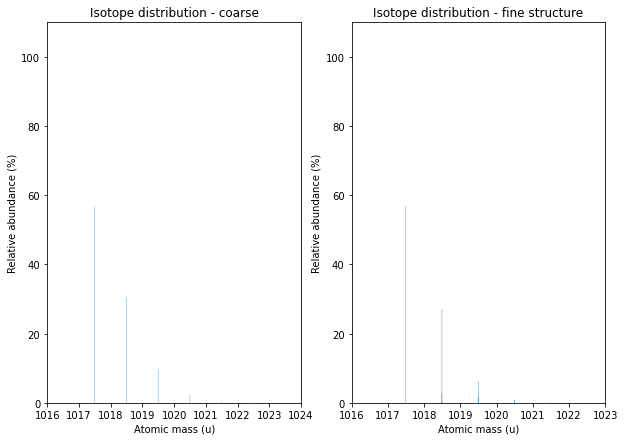

In [7]:
import math
from matplotlib import pyplot as plt

def plotIsotopeDistribution(isotope_distribution, title="Isotope distribution"):
    plt.title(title)
    distribution = {"mass": [], "abundance": []}
    for iso in isotope_distribution.getContainer():
        distribution["mass"].append(iso.getMZ())
        distribution["abundance"].append(iso.getIntensity() * 100)

    bars = plt.bar(distribution["mass"], distribution["abundance"], width=0.01, snap=False) 

    plt.ylim([0, 110])
    plt.xticks(range(math.ceil(distribution["mass"][0]) - 2,
                     math.ceil(distribution["mass"][-1]) + 2))
    plt.xlabel("Atomic mass (u)")
    plt.ylabel("Relative abundance (%)")

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plotIsotopeDistribution(coarse_isotopes, "Isotope distribution - coarse")
plt.subplot(1,2,2)
plotIsotopeDistribution(fine_isotopes, "Isotope distribution - fine structure")
plt.show()

In [8]:
suffix = seq.getSuffix(3) 
print("="*35)
print("y3 ion sequence:", suffix)
y3_formula = suffix.getFormula(Residue.ResidueType.YIon, 2)
suffix.getMonoWeight(Residue.ResidueType.YIon, 2) / 2.0 
suffix.getMonoWeight(Residue.ResidueType.XIon, 2) / 2.0 
suffix.getMonoWeight(Residue.ResidueType.BIon, 2) / 2.0 

print("y3 mz:", suffix.getMonoWeight(Residue.ResidueType.YIon, 2) / 2.0 )
print("y3 molecular formula:", y3_formula)

y3 ion sequence: GER
y3 mz: 181.09514384957103
y3 molecular formula: C13H24N6O6


In [9]:
 seq = AASequence.fromString("PEPTIDESEKUEM(Oxidation)CER")
 print(seq.toUnmodifiedString())
 print(seq.toString())
 print(seq.toUniModString())
 print(seq.toBracketString())
 print(seq.toBracketString(False))

 print(AASequence.fromString("DFPIAM(UniMod:35)GER"))
print(AASequence.fromString("DFPIAM[+16]GER"))
 print(AASequence.fromString("DFPIAM[+15.99]GER"))
print(AASequence.fromString("DFPIAM[147]GER"))
print(AASequence.fromString("DFPIAM[147.035405]GER"))

PEPTIDESEKUEMCER
PEPTIDESEKUEM(Oxidation)CER
PEPTIDESEKUEM(UniMod:35)CER
PEPTIDESEKUEM[147]CER
PEPTIDESEKUEM[147.03540001709996]CER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER
DFPIAM(Oxidation)GER


In [10]:
 s = AASequence.fromString(".(Dimethyl)DFPIAMGER.")
print(s, s.hasNTerminalModification())
s = AASequence.fromString(".DFPIAMGER.(Label:18O(2))")
print(s, s.hasCTerminalModification())
s = AASequence.fromString(".DFPIAMGER(Phospho).")
print(s, s.hasCTerminalModification())

.(Dimethyl)DFPIAMGER True
DFPIAMGER.(Label:18O(2)) True
DFPIAMGER(Phospho) False


In [14]:
bsa = FASTAEntry() 
bsa.sequence = "MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE"
bsa.description = "BSA Bovine Albumin (partial sequence)"
bsa.identifier = "BSA"

alb = FASTAEntry()
alb.sequence = "MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE"
alb.description = "ALB Human Albumin (partial sequence)"
alb.identifier = "ALB"

entries = [bsa, alb]

f = FASTAFile()
f.store("example.fasta", entries)
entries = []
f = FASTAFile()
f.load("example.fasta", entries)
print( len(entries) )
for e in entries:
  print (e.identifier, e.sequence)

2
BSA MKWVTFISLLLLFSSAYSRGVFRRDTHKSEIAHRFKDLGE
ALB MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGE
